In [1]:
import torch 
import matplotlib.pyplot as plt

In [2]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [4]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

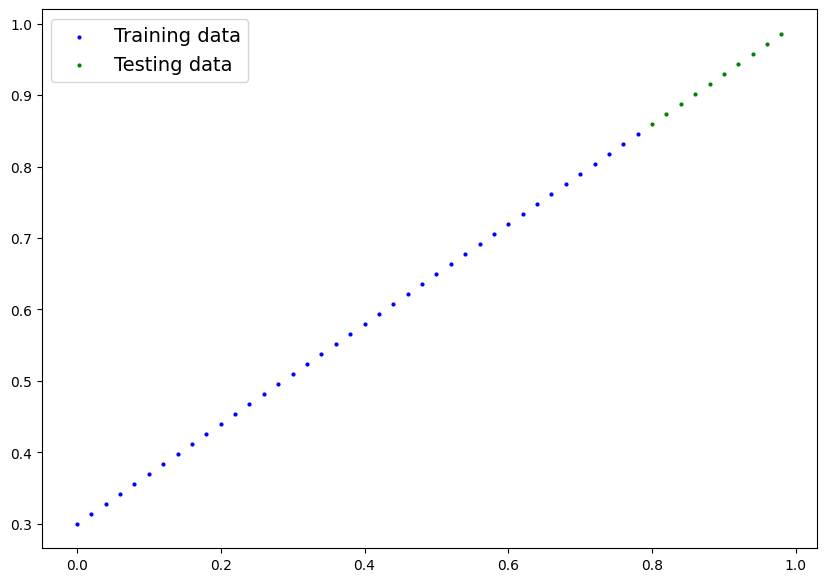

In [5]:
plot_predictions();

In [6]:
from torch import nn

In [7]:
import torch
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [8]:
##pytorch model building 

##creating a random seed 
torch.manual_seed(42)

#Create an instance of the model 
model0=LinearRegressionModel()
list(model0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

# Prediction 


In [9]:
with torch.inference_mode():
    y_preds= model0(X_test)
    
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [10]:
with torch.no_grad():
    y_preds= model0(y_test)

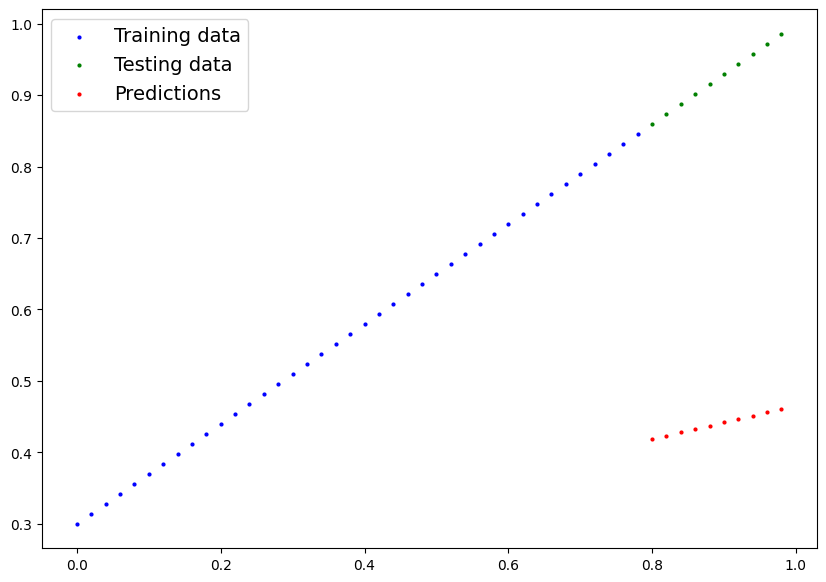

In [11]:
plot_predictions(predictions=y_preds)

In [12]:
#setup  a loss function 
loss_fn= nn.L1Loss()

#set up an optimizer 
optimizer= torch.optim.SGD(params=model0.parameters(), 
                           lr=0.01)

In [13]:
#Building a training loop and a testing loop 

epochs=200 #loop through the data 
epoch_count=[]
loss_values=[]
test_loss_values=[]

 
 
#loop through the data 
for epoch in range(epochs):
    #Set the model to training mode)
    model0.train() #train mode in pytorch sets all parameters that require gradients
    #forward pass 
    y_pred = model0(X_train)
    #calculate the loss 
    loss=loss_fn(y_pred,y_train)
    print(f"loss: {loss}")
    
    #optimizer zero grad 
    optimizer.zero_grad()
    
    #
    loss.backward()
    
    optimizer.step() #changing the parameter value 
    
    model0.eval() # turns of gradient tracking
    with torch.inference_mode():
        test_pred=model0(X_test)   # 1. forward pass
        test_loss= loss_fn(test_pred, y_test) # calculate the loss
    if epoch % 10 ==0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch:{epoch}| loss:{loss} | loss{test_loss}") 
        print(model0.state_dict())
    
 


loss: 0.31288138031959534
Epoch:0| loss:0.31288138031959534 | loss0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
loss: 0.3013603389263153
loss: 0.28983935713768005
loss: 0.2783183455467224
loss: 0.26679736375808716
loss: 0.2552763521671295
loss: 0.24375534057617188
loss: 0.23223432898521423
loss: 0.22071333229541779
loss: 0.20919232070446014
loss: 0.1976713240146637
Epoch:10| loss:0.1976713240146637 | loss0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
loss: 0.18615034222602844
loss: 0.1746293306350708
loss: 0.16310831904411316
loss: 0.1515873372554779
loss: 0.14006634056568146
loss: 0.1285453587770462
loss: 0.11702437698841095
loss: 0.1060912236571312
loss: 0.09681282937526703
loss: 0.08908725529909134
Epoch:20| loss:0.08908725529909134 | loss0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
loss: 0.08227583020925522
loss: 0.07638873159885406
loss: 0.071

In [14]:
model0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [15]:
with torch.inference_mode():
    y_preds_new=model0(X_test)

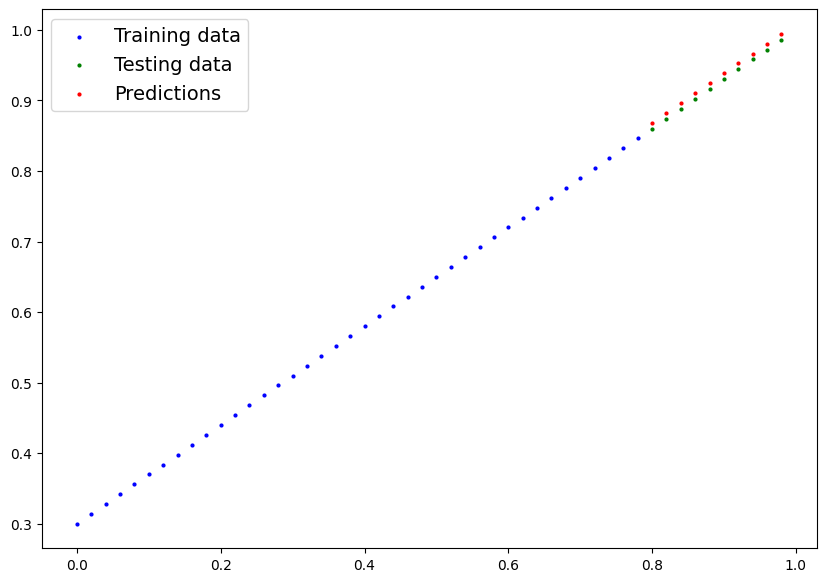

In [16]:
plot_predictions(predictions=y_preds_new)

In [17]:
import numpy as np 


Text(0.5, 0, 'epochs')

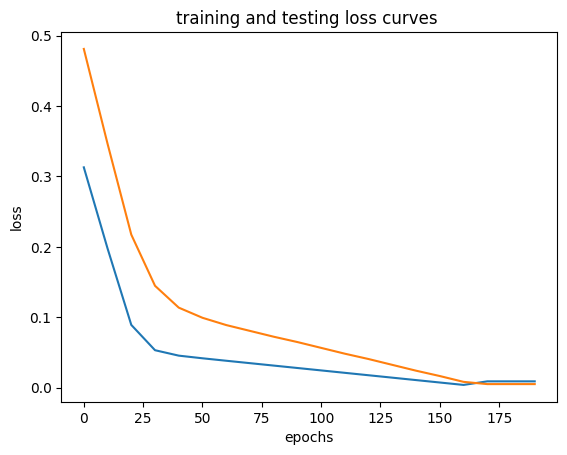

In [18]:
#plot the loss curves 
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label= "train loss")
plt.plot(epoch_count, test_loss_values, label= "Test loss")
plt.title("training and testing loss curves ")
plt.ylabel("loss")
plt.xlabel("epochs")



In [19]:
#saving a model in pytorch 
# there are three main methods for saving and loading models in pytorch 

#torch.save
#torch.load()
#torch.nn.Module.load_state_dict()


from pathlib import Path 

#create a model directory 
Model_path= Path("models")
Model_path.mkdir(parents=True, exist_ok=True)


# Model save path 
Model_name= "01_pytorch_workflow_0.pth"
Model_save_path= Model_path/ Model_name

Model_save_path

# SAVE  the model 
print(f'Saving model to : {Model_save_path}')
torch.save(obj=model0.state_dict(), 
           f= Model_save_path)

Saving model to : models/01_pytorch_workflow_0.pth


In [20]:
!ls -l models

total 8
-rw-r--r--  1 mdasifbinsyed  staff  1580 Jul 31 23:49 01_pytorch_workflow_0.pth


In [21]:
## Loading a pytorch model 
#since we saved our model in state_dict()

model0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [28]:
# To load in a save state dict 
laoded_model0 = LinearRegressionModel()

In [23]:


# Load the save statedict of model0
laoded_model0.load_state_dict(torch.load(f=Model_save_path))

/var/folders/jk/ys8bkc_x48j8j32_jl8lv1440000gn/T/ipykernel_74401/251171734.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  laoded_model0.load_state_dict(torch.load(f=Mod

<All keys matched successfully>

In [24]:
laoded_model0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [29]:
laoded_model0.eval()

with torch.inference_mode():
    loaded_model_preds= loaded_model0(X_test)
    
loaded_model_preds


NameError: name 'loaded_model0' is not defined